In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
df = pd.read_csv("/content/NORMAL_MLY_sample_csv.csv")

In [ ]:
df.head(5)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,MLY-TMIN-NORMAL,MLY-TMAX-NORMAL,MLY-PRCP-NORMAL
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,201001,-43,145,55
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,201002,4,199,44
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,201003,140,318,72
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,201004,294,517,98
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,201005,417,656,249


In [ ]:
prcp = []
min_normal = []
max_normal = []

In [ ]:
for i in range(len(df)):
  prcp.append(df["MLY-PRCP-NORMAL"][i])
  min_normal.append(df["MLY-TMIN-NORMAL"][i])
  max_normal.append(df["MLY-TMAX-NORMAL"][i])

In [ ]:
data = [max_normal,prcp]
print(data)

[array([145, 199, 318, 517, 656, 743, 793, 789, 685, 531, 337, 187]), array([ 55,  44,  72,  98, 249, 376, 322, 275, 208, 169,  81,  73])]


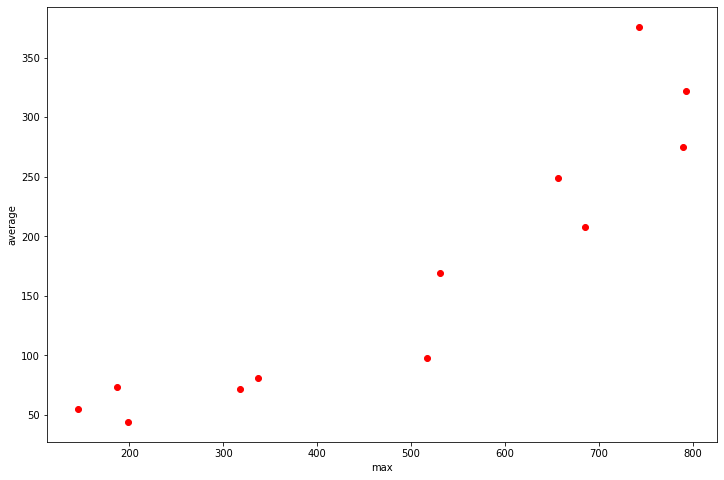

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(max_normal, prcp, 'ro')
plt.xlabel('max')
plt.ylabel('average')
plt.show()

In [ ]:
prcp = np.array([prcp])
min_normal = np.array([min_normal])
max_normal = np.array([max_normal])
print(prcp.shape)
print(max_normal.shape)
print(min_normal.shape)


(1, 12)
(1, 12)
(1, 12)


In [ ]:
print(max_normal)

[[145 199 318 517 656 743 793 789 685 531 337 187]]


In [ ]:
def loss(y_true,y_predict):
  res = 0
  m = len(y_true)
  for i in range(len(y_true)):
    res+= (y_true[i] - y_predict[i])**2
  return float(res/m)

In [71]:
class LinearRegression:
  def __init__(self):
    self.w0 = 0
    self.w1 = 0
    self.y0 = 0
    self.X =[]
    self.y = []
  def proof(self,X,y):
    self.X = X
    self.y = y
    one = np.ones((X.shape[0],1))
    Xbar = np.concatenate((one,X),axis = 1)

    a = np.dot(Xbar.T,Xbar)
    b = np.dot(Xbar.T,y)
    w = np.dot(np.linalg.pinv(a),b)
    self.w0 = w[0][0]
    self.w1 = w[1][0]
    print("w0 update to", self.w0)
    print("w1 update to",self.w1)
    self.x0 = np.linspace(0,500,2)
    self.y0 = w0 + w1*x0
    # print(y0,"=",w0,"+",w1,"*",x0)
    print("Finish update weight")
  def get_weight(self):
    print("w1:", self.w1)
    print("w0:",self.w0)
    return (self.w1,self.w0)
  def plot_graph(self):
    if self.X == [] or self.y == []:
      print("fail to plot, please add data")
      return False
    else:
      plt.plot(X.T, y.T, 'ro') 
      plt.plot(x0, y0)             
      plt.xlabel('target temperature')
      plt.ylabel('prcp')
      plt.show()
  def predict(self,x):
    return np.round(self.w1*x + w0,5)
  def loss(self,y_true):
    res = 0
    m = len(y_true)
    for i in range(len(y_true)):
      res+= (y_true[i] - self.predict(y))**2
    return float(res/m)

In [75]:
linear.predict(180)

180.0

In [73]:
linear = LinearRegression()


In [74]:
linear.proof(min_normal.T,prcp.T)

w0 update to -1.864464138634503e-11
w1 update to 1.0000000000000773
Finish update weight


In [70]:
print(linear.get_weight())

w1: 1.0000000000000773
w0: -1.864464138634503e-11
(1.0000000000000773, -1.864464138634503e-11)


In [ ]:
def linear_regression(X,y):
  one = np.ones((X.shape[0],1))
  Xbar = np.concatenate((one,X),axis = 1)

  a = np.dot(Xbar.T,Xbar)
  b = np.dot(Xbar.T,y)
  w = np.dot(np.linalg.pinv(a),b)
  print("w:",w)
  w0 = w[0][0]
  w1 = w[1][0]
  x0 = np.linspace(0,500,2)
  y0 = w0 + w1*x0
  print(y0,"=",w0,"+",w1,"*",x0)
  plt.plot(X.T, y.T, 'ro') 
  plt.plot(x0, y0)             
  plt.xlabel('max temperature')
  plt.ylabel('prcp')
  plt.show()

w: [[-1.86446414e-11]
 [ 1.00000000e+00]]
[-1.86446414e-11  5.00000000e+02] = -1.864464138634503e-11 + 1.0000000000000773 * [  0. 500.]


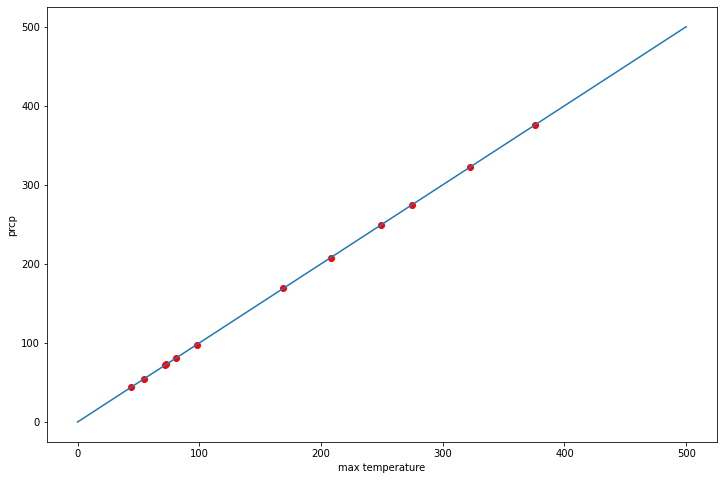

In [ ]:
linear_regression(min_normal.T,prcp.T)

w: [[-1.86446414e-11]
 [ 1.00000000e+00]]
[-1.86446414e-11  5.00000000e+02] = -1.864464138634503e-11 + 1.0000000000000773 * [  0. 500.]


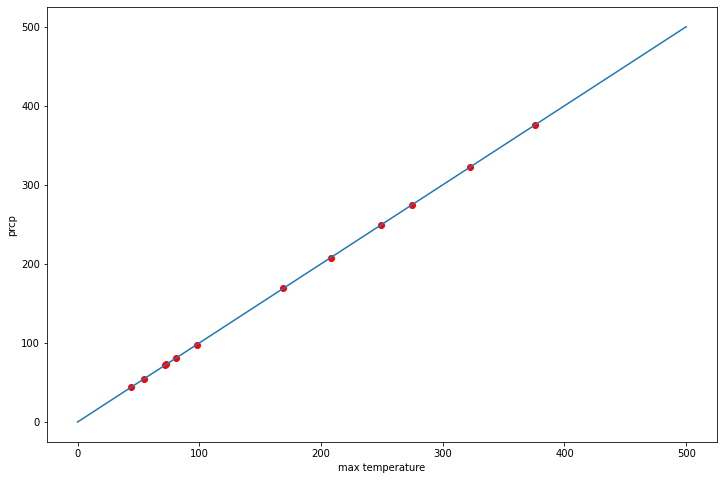

In [ ]:
X = min_normal.T
y = prcp.T
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one,X),axis = 1)

a = np.dot(Xbar.T,Xbar)
b = np.dot(Xbar.T,y)
w = np.dot(np.linalg.pinv(a),b)
print("w:",w)
w0 = w[0][0]
w1 = w[1][0]
x0 = np.linspace(0,500,2)
y0 = w0 + w1*x0
print(y0,"=",w0,"+",w1,"*",x0)
plt.plot(X.T, y.T, 'ro') 
plt.plot(x0, y0)             
plt.xlabel('max temperature')
plt.ylabel('prcp')
plt.show()

In [ ]:
y1 = w1*155 + w0
y2 = w1*160 + w0

In [ ]:
print(y1,y2)

154.99999999999332 159.99999999999372
